Before we get started, a couple of reminders to keep in mind when using iPython notebooks:

- Remember that you can see from the left side of a code cell when it was last run if there is a number within the brackets.
- When you start a new notebook session, make sure you run all of the cells up to the point where you last left off. Even if the output is still visible from when you ran the cells in your previous session, the kernel starts in a fresh state so you'll need to reload the data, etc. on a new session.
- The previous point is useful to keep in mind if your answers do not match what is expected in the lesson's quizzes. Try reloading the data and run all of the processing steps one by one in order to make sure that you are working with the same variables and data that are at each quiz stage.


## Load Data from CSVs

In [48]:
import unicodecsv

## Longer version of code (replaced with shorter, equivalent version below)

# enrollments = []
# f = open('enrollments.csv', 'rb')
# reader = unicodecsv.DictReader(f)
# for row in reader:
#     enrollments.append(row)
# f.close()

with open('enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    #NB: unicodecsv.DictReader produces dictionary
    enrollments = list(reader)
print ("type(enrollments)=", type(enrollments))
print ("len(enrollments)=", len(enrollments))
print ("enrollments[0]=", enrollments[0])
print ("enrollments[0]['account_key']=", enrollments[0]['account_key'])

type(enrollments)= <class 'list'>
len(enrollments)= 1640
enrollments[0]= {'status': 'canceled', 'account_key': '448', 'is_canceled': 'True', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'is_udacity': 'True', 'days_to_cancel': '65'}
enrollments[0]['account_key']= 448


In [49]:
#####################################
#                 1                 #
#####################################

## Read in the data from daily_engagement.csv and project_submissions.csv 
## and store the results in the below variables.
## Then look at the first row of each table.
with open('daily_engagement.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    daily_engagement = list(reader)
print ("type(reader)=", type(reader))
print ("type(daily_engagement)=", type(daily_engagement))
print ("daily_engagement[0]=", daily_engagement[0])
print ("len(daily_engagement)=", len(daily_engagement), "\n\n")
#daily_engagement = 
with open('project_submissions.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    project_submissions = list(reader)
print ("type(project_submissions)=", type(project_submissions))
print ("project_submissions[0]=", project_submissions[0])
print ("len(project_submissions)=", len(project_submissions), "\n\n")
#project_submissions = 

type(reader)= <class 'unicodecsv.py3.DictReader'>
type(daily_engagement)= <class 'list'>
daily_engagement[0]= {'acct': '0', 'lessons_completed': '0.0', 'projects_completed': '0.0', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'utc_date': '2015-01-09'}
len(daily_engagement)= 136240 


type(project_submissions)= <class 'list'>
project_submissions[0]= {'creation_date': '2015-01-14', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'completion_date': '2015-01-16', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}
len(project_submissions)= 3642 




In [50]:
#rewrite load csv files as function
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments = read_csv('enrollments.csv')
daily_engagement = read_csv('daily_engagement.csv')
project_submissions = read_csv('project_submissions.csv')
print ("len(enrollments)=", len(enrollments))
print ("len(daily_engagement)=", len(daily_engagement))
print ("len(project_submissions)=", len(project_submissions))
print ("enrollments[0]=", enrollments[0])
print ("daily_engagement[0]=", daily_engagement[0])
print ("project_submissions[0]=", project_submissions[0])

len(enrollments)= 1640
len(daily_engagement)= 136240
len(project_submissions)= 3642
enrollments[0]= {'status': 'canceled', 'account_key': '448', 'is_canceled': 'True', 'join_date': '2014-11-10', 'cancel_date': '2015-01-14', 'is_udacity': 'True', 'days_to_cancel': '65'}
daily_engagement[0]= {'acct': '0', 'lessons_completed': '0.0', 'projects_completed': '0.0', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'utc_date': '2015-01-09'}
project_submissions[0]= {'creation_date': '2015-01-14', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'completion_date': '2015-01-16', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


## Fixing Data Types

In [51]:
from datetime import datetime as dt

# Takes a date as a string, and returns a Python datetime object. 
# If there is no date given, returns None
#refer https://docs.python.org/3/library/datetime.html
def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')
    
# Takes a string which is either an empty string or represents an integer,
# and returns an int or None.
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
try:
    for enrollment in enrollments:
        enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
        enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
        enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
        enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
        enrollment['join_date'] = parse_date(enrollment['join_date'])
except TypeError:
    print ("enrollments already converted.")
enrollments[0]

{'account_key': '448',
 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 'days_to_cancel': 65,
 'is_canceled': True,
 'is_udacity': True,
 'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 'status': 'canceled'}

In [52]:
print ("before formatting fix: daily_engagement[0]=\n", daily_engagement[0])
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    try:
        #NB: lessons completed must be an integer. convert string to float, then convert to int.
        engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
        #NB: num_courses_visited must be an integer. convert string to float, then convert to int.
        engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
        #NB: projects_completed must be an integer. convert string to float, then convert to int.
        engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
        #total_minutes_visited can be a float. no need to convert to int.
        engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
        engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    except TypeError:
        print ("\nstrings already converted to int(float). break out of loop. \n")
        break
    
print ("after formatting fix: daily_engagement[0]=\n", daily_engagement[0])
daily_engagement[0]

before formatting fix: daily_engagement[0]=
 {'acct': '0', 'lessons_completed': '0.0', 'projects_completed': '0.0', 'num_courses_visited': '1.0', 'total_minutes_visited': '11.6793745', 'utc_date': '2015-01-09'}
after formatting fix: daily_engagement[0]=
 {'acct': '0', 'lessons_completed': 0, 'projects_completed': 0, 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}


{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [53]:
# Clean up the data types in the submissions table

#setup basestring for testing if objects are string. test if data is class string.
try:
  basestring
except NameError:
  basestring = str

if isinstance(project_submissions[0]['completion_date'], basestring):
    print ("before type conversion, project_submissions[0]=", project_submissions[0])
    for submission in project_submissions:
            submission['completion_date'] = parse_date(submission['completion_date'])
            submission['creation_date'] = parse_date(submission['creation_date'])
else:
    print ("\n\n type conversion already done. skip. \n\n")

print ("\n\nafter  type conversion, project_submissions[0]=\n", project_submissions[0])
daily_engagement[0]

before type conversion, project_submissions[0]= {'creation_date': '2015-01-14', 'assigned_rating': 'UNGRADED', 'account_key': '256', 'completion_date': '2015-01-16', 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


after  type conversion, project_submissions[0]=
 {'creation_date': datetime.datetime(2015, 1, 14, 0, 0), 'assigned_rating': 'UNGRADED', 'account_key': '256', 'completion_date': datetime.datetime(2015, 1, 16, 0, 0), 'lesson_key': '3176718735', 'processing_state': 'EVALUATED'}


{'acct': '0',
 'lessons_completed': 0,
 'num_courses_visited': 1,
 'projects_completed': 0,
 'total_minutes_visited': 11.6793745,
 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

Note when running the above cells that we are actively changing the contents of our data variables. If you try to run these cells multiple times in the same session, an error will occur.

## Investigating the Data

In [54]:
#####################################
#                 2                 #
#####################################

## Find the total number of rows and the number of unique students (account keys)
## in each table.

def getUniqueColValues(listFromCsv, columnName):
    uniqueElement = set()
    for element in listFromCsv:
        uniqueElement.add(element[columnName])
    return uniqueElement

enrollment_num_unique_students = getUniqueColValues(enrollments, 'account_key')
#print (type(enrollment_num_unique_students))
print ("len(enrollment_num_unique_students)=", len(enrollment_num_unique_students))
unique_engagement_students = getUniqueColValues(daily_engagement, 'acct')
#unique_engagement_students = getUniqueColValues(daily_engagement, 'account_key')
print ("len(unique_engagement_students)=", len(unique_engagement_students))
unique_project_submitters = getUniqueColValues(project_submissions, 'account_key')
print ("len(unique_project_submitters)=", len(unique_project_submitters))
print (type(daily_engagement[0]))
#print ("daily_engagement[0]['account_key']=", daily_engagement[0]['account_key'])
print ("daily_engagement[0]['account_key']=", daily_engagement[0]['acct'])

len(enrollment_num_unique_students)= 1302
len(unique_engagement_students)= 1237
len(unique_project_submitters)= 743
<class 'dict'>
daily_engagement[0]['account_key']= 0


## Problems in the Data

In [55]:
#####################################
#                 3                 #
#####################################

## Rename the "acct" column in the daily_engagement table to "account_key".
for engagement_record in daily_engagement:
    engagement_record['account_key'] = engagement_record['acct']
    del[engagement_record['acct']]
    #replace these two lines with one line.
    #try:
    #    engagement_record['account_key'] = engagement_record.pop('acct')
    #except KeyError:
    #    print ("key already removed.")
    #    break
print ("daily_engagement[0]=\n", daily_engagement[0])
print ("daily_engagement[0]=\n", daily_engagement[1])

daily_engagement[0]=
 {'lessons_completed': 0, 'account_key': '0', 'projects_completed': 0, 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
daily_engagement[0]=
 {'lessons_completed': 0, 'account_key': '0', 'projects_completed': 0, 'num_courses_visited': 2, 'total_minutes_visited': 37.2848873333, 'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}


In [56]:
#####################################
#                 4                 #
#####################################

## Find any one student enrollments where the student is missing from the daily engagement table.
## Output that enrollment.
def get_unique_students(data):
    #build set of unique values for 'account_key' in given arg
    unique_students = set()
    for data_point in data:
        unique_students.add(data_point['account_key'])
    return unique_students
print ("len(enrollments)=", len(enrollments))
print ("type(enrollments)=", type(enrollments))
unique_enrolled_students = get_unique_students(enrollments)
print ("type(unique_enrolled_students)=", type(unique_enrolled_students))
print ("len(unique_enrolled_students)=", len(unique_enrolled_students))
print ("\n\n")
print ("len(daily_engagement)=", len(daily_engagement))
unique_engagement_students = get_unique_students(daily_engagement)
print ("len(unique_engagement_students)=", len(unique_engagement_students))
print ("\n\n")
print ("len(project_submissions)=", len(project_submissions))
unique_project_submitters = get_unique_students(project_submissions)
print ("len(unique_project_submitters)=", len(unique_project_submitters))

#why are students in 'unique_enrolled_students' missing from the 'unique_engagement_students'
print("type(unique_enrolled_students)=", type(unique_enrolled_students))
print("type(unique_engagement_students)=", type(unique_engagement_students))
sampleSize = 3
count = 0
#find unique_enrolled_students not in unique_engagement_students
#print some records of these students for inspection
print ("\n\n1st method")
for student in unique_enrolled_students:
    if student not in unique_engagement_students:
        #print ("student w account_key=", student, " not in unique_engagement_students")
        for record in enrollments:
            if record['account_key'] == student:
                print ("record=", record)
                count += 1
        if count >=sampleSize: break
            

print ("\n\n2nd method")
count = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print (enrollment)
        count += 1
        if count >=sampleSize: break

#all have 'status': 'canceled' & 'is_canceled': True, 'days_to_cancel': 0
#also 'cancel_date' = 'join_date'. ie: they enrolled and cancelled the same day
#makes sense - these are students who have cancelled.


len(enrollments)= 1640
type(enrollments)= <class 'list'>
type(unique_enrolled_students)= <class 'set'>
len(unique_enrolled_students)= 1302



len(daily_engagement)= 136240
len(unique_engagement_students)= 1237



len(project_submissions)= 3642
len(unique_project_submitters)= 743
type(unique_enrolled_students)= <class 'set'>
type(unique_engagement_students)= <class 'set'>


1st method
record= {'status': 'canceled', 'account_key': '727', 'is_canceled': True, 'join_date': datetime.datetime(2014, 12, 7, 0, 0), 'cancel_date': datetime.datetime(2014, 12, 7, 0, 0), 'is_udacity': False, 'days_to_cancel': 0}
record= {'status': 'canceled', 'account_key': '1010', 'is_canceled': True, 'join_date': datetime.datetime(2015, 1, 11, 0, 0), 'cancel_date': datetime.datetime(2015, 1, 11, 0, 0), 'is_udacity': False, 'days_to_cancel': 0}
record= {'status': 'canceled', 'account_key': '841', 'is_canceled': True, 'join_date': datetime.datetime(2014, 11, 12, 0, 0), 'cancel_date': datetime.datetime(2014, 11, 12,

## Missing Engagement Records

## Checking for More Problem Records

In [57]:
#####################################
#                 5                 #
#####################################

## Find the number of surprising data points (enrollments missing from
## the engagement table) that remain, if any.

#students in the enrollment table who are missing from the engagement table, but were enrolled for >= 1 day.
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        #print (type(enrollment['days_to_cancel']))
        if enrollment['days_to_cancel'] is not None and enrollment['days_to_cancel']>0:
            print (enrollment)
        
#results = 2 records with 'is_udacity': True.
#these are test accounts created by udacity. need to be discarded prior to analysis.

{'status': 'canceled', 'account_key': '1304', 'is_canceled': True, 'join_date': datetime.datetime(2015, 1, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), 'is_udacity': True, 'days_to_cancel': 59}
{'status': 'canceled', 'account_key': '1304', 'is_canceled': True, 'join_date': datetime.datetime(2015, 3, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), 'is_udacity': True, 'days_to_cancel': 99}


### Tracking Down the Remaining Problems

In [58]:
# Create a set of the account keys for all Udacity test accounts
print ("enrollments[0]=", enrollments[0])
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']:
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

enrollments[0]= {'status': 'canceled', 'account_key': '448', 'is_canceled': True, 'join_date': datetime.datetime(2014, 11, 10, 0, 0), 'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), 'is_udacity': True, 'days_to_cancel': 65}


6

In [59]:
# Given some data with an account_key field, removes any records corresponding to Udacity test accounts
def remove_udacity_accounts(data):
    non_udacity_data = []
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [60]:
# Remove Udacity test accounts from all three tables
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)

print (len(non_udacity_enrollments))
print (len(non_udacity_engagement))
print (len(non_udacity_submissions))

1622
135656
3634


In [61]:
#find students who cancelled within one day of joining.
#https://youtu.be/R5EsIDJ0apw?t=22
#NB: this explains why the student is missing from the engagement table.
#row in enrolments table, cancel_date = join_date, or days_to_cancel=0 (?)
# these columns ['is_canceled'=True or 'status': 'canceled'] are useful but don't prove the same event.
cancelledSameDayKeys = []
for enrollment in enrollments:
    if enrollment['cancel_date'] == enrollment['join_date']:
        cancelledSameDayKeys.append(enrollment['account_key'])
print (len(cancelledSameDayKeys))
print (cancelledSameDayKeys)

92
['448', '448', '448', '448', '322', '1219', '871', '895', '1218', '499', '654', '654', '654', '964', '295', '346', '817', '1171', '884', '875', '1120', '728', '1191', '682', '5', '1010', '841', '1035', '640', '707', '717', '727', '1273', '1238', '1044', '749', '1129', '1129', '853', '1296', '926', '379', '711', '803', '799', '789', '819', '819', '902', '996', '1213', '733', '1237', '1069', '1086', '1190', '914', '914', '1279', '968', '1155', '825', '766', '1039', '739', '1222', '1125', '708', '1025', '750', '889', '737', '878', '981', '653', '1177', '1148', '1119', '1186', '725', '1145', '658', '802', '664', '997', '870', '1284', '1079', '1063', '1270', '1291', '1241']


## Refining the Question

In [62]:
#####################################
#                 6                 #
#####################################

## Create a dictionary named paid_students containing all students who either
## haven't canceled yet or who remained enrolled for more than 7 days. The keys
## should be account keys, and the values should be the date the student enrolled.

#"haven't canceled yet" : enrollment['is_canceled'] = False
# OR
#remained enrolled for more than 7 days: enrollment['cancel_date'] > 7 days after enrollment['join_date']
from datetime import date

paid_students = {}
count = 0
print("len(non_udacity_enrollments)=", len(non_udacity_enrollments))
for enrollment in non_udacity_enrollments:
    #print ("enrollment['is_canceled']=", enrollment['is_canceled'])
    #if not enrollment['is_canceled']:  #keep this as is works.
    #print ("join_date=", enrollment['join_date'], "cancel_date=", enrollment['cancel_date'])
    if enrollment['cancel_date']:
        daysEnrolled = (enrollment['cancel_date'] - enrollment['join_date']).days
    else: 
        daysEnrolled = -1
    #print ("type(daysEnrolled)=", type(daysEnrolled))
    #print ("cancel_date-join_date = ", daysEnrolled)
    if daysEnrolled>7 or not enrollment['is_canceled']:
        paid_students[enrollment['account_key']] = enrollment['join_date']
        count += 1
print ("len(paid_students)=", len(paid_students))
#print ("paid_students=", paid_students)

len(non_udacity_enrollments)= 1622
len(paid_students)= 995


## Getting Data from First Week

In [63]:
# Takes a student's join date and the date of a specific engagement record,
# and returns True if that engagement record happened within one week
# of the student joining.
#NB: added condition time_delta.days must be positive.
# refer https://youtu.be/adqc5fF5B8Y
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    #return time_delta.days < 7 # original version. 
    return time_delta.days >= 0 and time_delta.days < 7

def remove_free_trial_cancels(data):
    #paid_students is a list of keys for enrollments meeting these conditions
    #"haven't canceled yet" : enrollment['is_canceled'] = False
    # OR
    #remained enrolled for more than 7 days: enrollment['cancel_date'] > 7 days after enrollment['join_date']
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

#clean data by removing udacity test accounts. uses remove_free_trial_cancels method
# and non_udacity_xxxx which is formed from method remove_udacity_accounts
# method remove_udacity_accounts used udacity_test_accounts 
# udacity_test_accounts are records in enrollments where enrollments['is_udacity']=True

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print ("len(paid_enrollments)=", len(paid_enrollments))
print ("len(paid_engagement)", len(paid_engagement))
print ("len(paid_submissions)", len(paid_submissions))

paid_engagement_in_first_week = []
# loop through paid_engagement records
# paid_students contains all students who either haven't canceled yet or remained enrolled for more than 7 days.
# recall that paid_students[enrollment['account_key']] = enrollment['join_date']
# test if engagement date & date joined  are within 7 days.
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

print ("len(paid_engagement_in_first_week)=", len(paid_engagement_in_first_week))

len(paid_enrollments)= 1293
len(paid_engagement) 134549
len(paid_submissions) 3618
len(paid_engagement_in_first_week)= 6920


In [64]:
#####################################
#                 7                 #
#####################################

## Create a list of rows from the engagement table including only rows where
## the student is one of the paid students you just found, and the date is within
## one week of the student's join date.

#see cell above
for i in range (5):
    print (paid_engagement_in_first_week[i])

{'lessons_completed': 0, 'account_key': '0', 'projects_completed': 0, 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
{'lessons_completed': 0, 'account_key': '0', 'projects_completed': 0, 'num_courses_visited': 2, 'total_minutes_visited': 37.2848873333, 'utc_date': datetime.datetime(2015, 1, 10, 0, 0)}
{'lessons_completed': 0, 'account_key': '0', 'projects_completed': 0, 'num_courses_visited': 2, 'total_minutes_visited': 53.6337463333, 'utc_date': datetime.datetime(2015, 1, 11, 0, 0)}
{'lessons_completed': 0, 'account_key': '0', 'projects_completed': 0, 'num_courses_visited': 1, 'total_minutes_visited': 33.4892696667, 'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}
{'lessons_completed': 0, 'account_key': '0', 'projects_completed': 0, 'num_courses_visited': 1, 'total_minutes_visited': 64.7796776667, 'utc_date': datetime.datetime(2015, 1, 13, 0, 0)}


## Exploring Student Engagement

In [65]:
from collections import defaultdict

# Create a dictionary of engagement grouped by student.
# The keys are account keys, and the values are lists of engagement records.
# refer api docs https://docs.python.org/3/library/collections.html#collections.defaultdict
# youtube lecture = https://youtu.be/6QLiscx_zIY 
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

print ("type(engagement_by_account)=", type(engagement_by_account))
print ("len(engagement_by_account)=", len(engagement_by_account))
#print ("first key = ", list(engagement_by_account.keys())[0])
firstKey = list(engagement_by_account.keys())[0]
print (type(firstKey))
#hide next because it is long.
#print ("engagement_by_account[",firstKey,"]=",engagement_by_account[firstKey])
print ("type(engagement_by_account[firstKey])=", type(engagement_by_account[firstKey]))
print ("len(engagement_by_account[firstKey])=", len(engagement_by_account[firstKey]))
print ("type(engagement_by_account[firstKey][0])=", type(engagement_by_account[firstKey][0]))

#notes: 995 records, each record is a list, each list item is a dict and is filtered from the original engagement data.

type(engagement_by_account)= <class 'collections.defaultdict'>
len(engagement_by_account)= 995
<class 'str'>
type(engagement_by_account[firstKey])= <class 'list'>
len(engagement_by_account[firstKey])= 7
type(engagement_by_account[firstKey][0])= <class 'dict'>


In [66]:
# Create a dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
# refer lecture https://youtu.be/6QLiscx_zIY?t=110
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    #loops through collections.defaultdict object 'engagement_by_account'
    #each engagement_for_student retrieved is a list object.
    total_minutes = 0
    for engagement_record in engagement_for_student:
        #retrieve each record and add 'total_minutes_visited' to total.
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes
    
print ("type(total_minutes_by_account)=", type(total_minutes_by_account))
firstKey = list(total_minutes_by_account.keys())[0]
#print ("firstKey of total_minutes_by_account=", firstKey)
print ("total_minutes_by_account[", firstKey, "]=", total_minutes_by_account[firstKey])
print ("len(total_minutes_by_account)=", len(total_minutes_by_account))

type(total_minutes_by_account)= <class 'dict'>
total_minutes_by_account[ 87 ]= 1035.306503999
len(total_minutes_by_account)= 995


In [67]:
#refer lecture https://youtu.be/6QLiscx_zIY?t=160
import numpy as np

# Summarize the data about minutes spent in the classroom
total_minutes = total_minutes_by_account.values()
#print ("type(total_minutes)=", type(total_minutes))
total_minutes = list(total_minutes)
#NB: conversion to list required in python 3.5 since dict_values returns a view cf python 2.7
#refer https://docs.python.org/3/library/stdtypes.html#dictionary-view-objects
#print ("after conversion to list type(total_minutes)=", type(total_minutes))
print ("len(total_minutes)=", len(total_minutes), "\n")
print ('Mean:', np.mean(total_minutes))
print ('Standard deviation:', np.std(total_minutes))
print ('Minimum:', np.min(total_minutes))
print ('Maximum:', np.max(total_minutes))
#NB the Maximum is excessively high & exceeds number of minutes in a week

len(total_minutes)= 995 

Mean: 305.414718908
Standard deviation: 405.91261032
Minimum: 0.0
Maximum: 3564.7332645


## Debugging Data Analysis Code

In [68]:
#####################################
#                 8                 #
#####################################
student_with_max_minutes = None
max_minutes = 0

#total_minutes_by_account = dictionary with the total minutes each student spent in the classroom during the first week.
# The keys are account keys, and the values are numbers (total minutes)
print (type(total_minutes_by_account))

for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > max_minutes:
        max_minutes = total_minutes
        student_with_max_minutes = student

print ("max_minutes=", max_minutes, "student_with_max_minutes=", student_with_max_minutes)

print ("type(paid_engagement_in_first_week)=", type(paid_engagement_in_first_week))#is a list
print ("type(paid_engagement_in_first_week[0])=", type(paid_engagement_in_first_week[0]))#is a list
print ("paid_engagement_in_first_week[0].keys()=\n", list(paid_engagement_in_first_week[0].keys()), "\n")

student_with_max_minutesMinutes = []
for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] == student_with_max_minutes:
        print (engagement_record)
        student_with_max_minutesMinutes.append(engagement_record['total_minutes_visited'])
        pass
print ("student_with_max_minutesMinutes=", student_with_max_minutesMinutes)
print ("len(maxMinutes)=", len(student_with_max_minutesMinutes))#should be <= 7
print ("type(student_with_max_minutesMinutes)=", type(student_with_max_minutesMinutes))
print ("type(student_with_max_minutesMinutes[0])=", type(student_with_max_minutesMinutes[0]))
print ("max(student_with_max_minutesMinutes)=", max(student_with_max_minutesMinutes))
print ("sum(student_with_max_minutesMinutes)=", sum(student_with_max_minutesMinutes))
        
## Go through a similar process as before to see if there is a problem.
## Locate at least one surprising piece of data, output it, and take a look at it.

print ("max(total_minutes_by_account.items(), key=lambda pair: pair[1])=", max(total_minutes_by_account.items(), key=lambda pair: pair[1]))

<class 'dict'>
max_minutes= 3564.7332644989997 student_with_max_minutes= 163
type(paid_engagement_in_first_week)= <class 'list'>
type(paid_engagement_in_first_week[0])= <class 'dict'>
paid_engagement_in_first_week[0].keys()=
 ['lessons_completed', 'account_key', 'projects_completed', 'num_courses_visited', 'total_minutes_visited', 'utc_date'] 

{'lessons_completed': 4, 'account_key': '163', 'projects_completed': 0, 'num_courses_visited': 4, 'total_minutes_visited': 850.519339666, 'utc_date': datetime.datetime(2015, 7, 9, 0, 0)}
{'lessons_completed': 6, 'account_key': '163', 'projects_completed': 0, 'num_courses_visited': 6, 'total_minutes_visited': 872.633923334, 'utc_date': datetime.datetime(2015, 7, 10, 0, 0)}
{'lessons_completed': 6, 'account_key': '163', 'projects_completed': 0, 'num_courses_visited': 2, 'total_minutes_visited': 777.018903666, 'utc_date': datetime.datetime(2015, 7, 11, 0, 0)}
{'lessons_completed': 2, 'account_key': '163', 'projects_completed': 0, 'num_courses_visit

## Lessons Completed in First Week

In [69]:
#####################################
#                 9                 #
#####################################

## Adapt the code above to find the mean, standard deviation, minimum, and maximum for
## the _number of lessons_ completed by each student during the first week. Try creating
## one or more functions to re-use the code above.
# refer https://youtu.be/nZq-Y2lfjpY

from collections import defaultdict

def group_data(data, key_name):
    grouped_data = defaultdict(list)
    for data_point in data:
        key = data_point[key_name]
        grouped_data[key].append(data_point)
    return grouped_data

print ("type(paid_engagement_in_first_week)=", type(paid_engagement_in_first_week))
print (paid_engagement_in_first_week[0])

#group paid_engagement_in_first_week by column 'account_key'
engagement_by_account = group_data(paid_engagement_in_first_week, 'account_key')
print (type(engagement_by_account))
firstKey = list(engagement_by_account.keys())[0]
print ("firstKey=", firstKey)
print ("length of dict = number of account keys =", len(list(engagement_by_account.keys())))
print ("first element of dictionary = \n", engagement_by_account[list(engagement_by_account.keys())[0]][0])
print ("type(first element of dictionary) = \n", type(engagement_by_account[list(engagement_by_account.keys())[0]][0]))
print ("first element of dictionary.keys=\n", list(engagement_by_account[list(engagement_by_account.keys())[0]][0].keys() ))

#total_minutes_by_account = sum column 'total_minutes_visited' of each item in list? 'engagement_by_account'

def sum_grouped_items(grouped_data, field_name):
    #returns dictionary with field_name as key & rows of grouped_data as keyed values.
    summed_data = {}
    #dictionary to store results in.
    for key, data_points in grouped_data.items():
        #loop through grouped_data of class collections.defaultdict
        #key = dictionary key,  data_points= value of key.
        total = 0
        for data_point in data_points:
            #loop through each record of grouped_data
            #get column, add to total
            total += data_point[field_name]
        summed_data[key] = total
        #store total in dictionary.
    return summed_data

total_minutes_by_account = sum_grouped_items(engagement_by_account, 'total_minutes_visited')
print ("\ntype(total_minutes_by_account)=", type(total_minutes_by_account))
firstKey = list(total_minutes_by_account.keys())[0]
print ("firstKey=", firstKey)
print ("type(total_minutes_by_account.values())=", type(total_minutes_by_account.values()), "\n")

import numpy as np

def describe_data(data):
    print ('Mean:', np.mean(data) )
    print ('Standard deviation:', np.std(data) )
    print ('Minimum:', np.min(data) )
    print ('Maximum:', np.max(data) )

print ("describe_data(total_minutes_by_account.values())")
describe_data(list(total_minutes_by_account.values()))
#list wrapper required for python 3.5 cf python 2.7

lessons_completed_by_account = sum_grouped_items(engagement_by_account, 'lessons_completed')
print ("\n describe_data(list(lessons_completed_by_account.values()))")
describe_data(list(lessons_completed_by_account.values()))

type(paid_engagement_in_first_week)= <class 'list'>
{'lessons_completed': 0, 'account_key': '0', 'projects_completed': 0, 'num_courses_visited': 1, 'total_minutes_visited': 11.6793745, 'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}
<class 'collections.defaultdict'>
firstKey= 87
length of dict = number of account keys = 995
first element of dictionary = 
 {'lessons_completed': 0, 'account_key': '87', 'projects_completed': 0, 'num_courses_visited': 0, 'total_minutes_visited': 0.0, 'utc_date': datetime.datetime(2015, 1, 12, 0, 0)}
type(first element of dictionary) = 
 <class 'dict'>
first element of dictionary.keys=
 ['lessons_completed', 'account_key', 'projects_completed', 'num_courses_visited', 'total_minutes_visited', 'utc_date']

type(total_minutes_by_account)= <class 'dict'>
firstKey= 87
type(total_minutes_by_account.values())= <class 'dict_values'> 

describe_data(total_minutes_by_account.values())
Mean: 305.414718908
Standard deviation: 405.91261032
Minimum: 0.0
Maximum: 3564.73

## Number of Visits in First Week

In [70]:
######################################
#                 10                 #
######################################

## Find the mean, standard deviation, minimum, and maximum for the number of
## days each student visits the classroom during the first week.
#refer https://youtu.be/5GYA5j1fqBU

#method 1 - add column to engagement_record if record in paid_engagement has 'num_courses_visited'>0
print (list(paid_engagement[0].keys()))
#NB: if executed previously the 'has_visited' already exists.
for engagement_record in paid_engagement:
    if engagement_record['num_courses_visited'] > 0:
        engagement_record['has_visited'] = 1
    else:
        engagement_record['has_visited'] = 0
print (list(paid_engagement[0].keys()))
days_visited_by_account = sum_grouped_items(engagement_by_account, 'has_visited')

print ("\n")
describe_data(list(days_visited_by_account.values()))

['lessons_completed', 'account_key', 'projects_completed', 'num_courses_visited', 'total_minutes_visited', 'utc_date']
['lessons_completed', 'account_key', 'projects_completed', 'num_courses_visited', 'total_minutes_visited', 'utc_date', 'has_visited']


Mean: 2.91256281407
Standard deviation: 2.22037005491
Minimum: 0
Maximum: 7


## Splitting out Passing Students

In [71]:
######################################
#                 11                 #
######################################

## Create two lists of engagement data for paid students in the first week.
## The first list should contain data for students who eventually pass the
## subway project, and the second list should contain data for students
## who do not.

#split engagement data into two lists, passing & non_passing.
print ("paid_submissions.keys=", list(paid_submissions[0].keys()))
print ("paid_engagement_in_first_week.keys=", list(paid_engagement_in_first_week[0].keys()))
assigned_ratings = set()
print (type(assigned_ratings))
for i in range(len(paid_submissions)):
    #print (paid_submissions[i])
    #print ('assigned_rating=', paid_submissions[i]['assigned_rating'])
    assigned_ratings.add(paid_submissions[i]['assigned_rating'])
print ("assigned_ratings=", assigned_ratings)
# 4 possible values found : 'DISTINCTION', 'PASSED', 'INCOMPLETE', '', 'UNGRADED'
# NB: the '' value. Need to use positive match to ensure desired behaviour.


subway_project_lesson_keys = ['746169184', '3176718735']

pass_subway_project = set()#will be set of 'account_key' values which passed subject

#loop through all paid_submissions, test if subject is in subway_project_lesson_keys 
# and if 'assigned_rating' is in ['DISTINCTION', 'PASSED'] then add to set 'pass_subway_project'
for submission in paid_submissions:
    if (submission['lesson_key'] in subway_project_lesson_keys and submission['assigned_rating'] in ['DISTINCTION', 'PASSED']):
        pass_subway_project.add(submission['account_key'])
        
print ("len(pass_subway_project)=", len(pass_subway_project))
        
passing_engagement = []
non_passing_engagement = []

for engagement_record in paid_engagement_in_first_week:
    if engagement_record['account_key'] in pass_subway_project:
        passing_engagement.append(engagement_record)
    else:
        non_passing_engagement.append(engagement_record)

print ("len(passing_engagement)=", len(passing_engagement))#answer to pass quiz is 4527, I get 4528
print ("len(non_passing_engagement)=", len(non_passing_engagement))#this returns 2392, matches teacher & passes quiz.


paid_submissions.keys= ['creation_date', 'assigned_rating', 'account_key', 'completion_date', 'lesson_key', 'processing_state']
paid_engagement_in_first_week.keys= ['lessons_completed', 'account_key', 'projects_completed', 'num_courses_visited', 'total_minutes_visited', 'utc_date', 'has_visited']
<class 'set'>
assigned_ratings= {'DISTINCTION', 'PASSED', 'INCOMPLETE', '', 'UNGRADED'}
len(pass_subway_project)= 647
4528
2392


In [94]:
print ("type(passing_engagement)=", type(passing_engagement))
print ("type(non_passing_engagement)=", type(non_passing_engagement))
print ("type(passing_engagement[0])=", type(passing_engagement[0]))
print ("type(non_passing_engagement[0])=", type(non_passing_engagement[0]))
print ("non_passing_engagement[0].keys()=", list(non_passing_engagement[0].keys()))
print ("passing_engagement[0].keys()=", list(passing_engagement[0].keys()))
#print (passing_engagement[0])
#print (non_passing_engagement[0])
#group passing_engagement on 'account_key'
passing_engagement_by_account = group_data(passing_engagement,'account_key')
print (type(passing_engagement_by_account))
#group non_passing_engagement on 'account_key'
non_passing_engagement_by_account = group_data(non_passing_engagement, 'account_key')
print (type(non_passing_engagement_by_account))

#NB: function group_data returns 'collections.defaultdict'
#sum_grouped_items(grouped_data, field_name):
#returns dictionary with field_name as key & rows of grouped_data as keyed values.
passing_minutes = sum_grouped_items(passing_engagement_by_account, 'total_minutes_visited')
print ("passing_minutes.keys()[0]=", list(passing_minutes.keys())[0])
non_passing_minutes = sum_grouped_items(non_passing_engagement_by_account, 'total_minutes_visited')
print ("non_passing_minutes.keys()[0]=", list(non_passing_minutes.keys())[0])


type(passing_engagement)= <class 'list'>
type(non_passing_engagement)= <class 'list'>
type(passing_engagement[0])= <class 'dict'>
type(non_passing_engagement[0])= <class 'dict'>
non_passing_engagement[0].keys()= ['lessons_completed', 'account_key', 'projects_completed', 'num_courses_visited', 'total_minutes_visited', 'utc_date', 'has_visited']
passing_engagement[0].keys()= ['lessons_completed', 'account_key', 'projects_completed', 'num_courses_visited', 'total_minutes_visited', 'utc_date', 'has_visited']
<class 'collections.defaultdict'>
<class 'collections.defaultdict'>
passing_minutes.keys()[0]= 87
non_passing_minutes.keys()[0]= 682


In [95]:
print ("\ndescribe_data non_passing_minutes")
describe_data(list(non_passing_minutes.values()))#Mean: 145, Maximum: 1768
print ("\ndescribe_data passing_minutes")
describe_data(list(passing_minutes.values()))#Mean: 391, Maximum: 3564
#more minutes engagement to pass cf non-pass.


describe_data non_passing_minutes
Mean: 145.399341866
Standard deviation: 268.97150373
Minimum: 0.0
Maximum: 1768.52274933

describe_data passing_minutes
Mean: 391.481722325
Standard deviation: 439.653061726
Minimum: 0.0
Maximum: 3564.7332645


In [98]:
#now compare 'lessons_completed' for passing_engagement_by_account & non_passing_engagement_by_account
print ("\nnon-passing students Lessons completed:")
non_passing_lessons = sum_grouped_items(non_passing_engagement_by_account,'lessons_completed')
describe_data(list(non_passing_lessons.values()))
print ("\npassing students Lessons completed:")
passing_lessons = sum_grouped_items(passing_engagement_by_account,'lessons_completed')
describe_data(list(passing_lessons.values()))
#passing mean > twice non-passing mean for No. of lessons completed.


non-passing students Lessons completed:
Mean: 0.867816091954
Standard deviation: 2.54833703959
Minimum: 0
Maximum: 27

passing students Lessons completed:
Mean: 2.04327666151
Standard deviation: 3.1428602763
Minimum: 0
Maximum: 36


In [107]:
#now compare 'has_visited' for passing_engagement_by_account & non_passing_engagement_by_account
#recall : 'has_visited' is column added to paid_engagement if record in paid_engagement has 'num_courses_visited'>0
print ("\nnon-passing students has_visited:")
non_passing_visits = sum_grouped_items(non_passing_engagement_by_account,'has_visited')
describe_data(list(non_passing_visits.values()))
print ("\npassing students has_visited:")
passing_visits = sum_grouped_items(passing_engagement_by_account,'has_visited')
describe_data(list(passing_visits.values()))
#refer https://youtu.be/6UYEM0XUSGQ
#results slightly different. small difference!!!


non-passing students has_visited:
Mean: 1.95114942529
Standard deviation: 1.88929952676
Minimum: 0
Maximum: 7

passing students has_visited:
Mean: 3.42967542504
Standard deviation: 2.21298340866
Minimum: 0
Maximum: 7


In [106]:
#short calc to show range of values of 'has_visited' column
has_visitedValues = set()
#print (len(paid_engagement))
#print (paid_engagement[0]['has_visited'])
for i in range(len(paid_engagement)):
    has_visitedValues.add(paid_engagement[i]['has_visited'])
#print ("len(has_visitedValues)=", len(has_visitedValues))
print ("has_visitedValues=", has_visitedValues)

has_visitedValues= {0, 1}


## Comparing the Two Student Groups

In [ ]:
######################################
#                 12                 #
######################################

## Compute some metrics you're interested in and see how they differ for
## students who pass the subway project vs. students who don't. A good
## starting point would be the metrics we looked at earlier (minutes spent
## in the classroom, lessons completed, and days visited).



## Making Histograms

(array([ 3.,  0.,  2.,  0.,  0.,  2.,  0.,  1.]),
 array([ 1.   ,  1.375,  1.75 ,  2.125,  2.5  ,  2.875,  3.25 ,  3.625,  4.   ]),
 <a list of 8 Patch objects>)

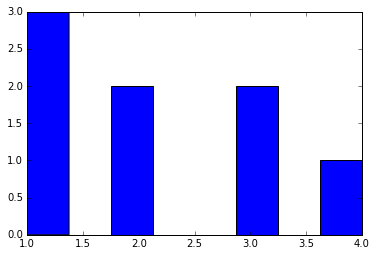

In [112]:
#simple demo
data = [1, 2, 1, 3, 3, 1, 4, 2]
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(data, bins=8)

Mean: 3.42967542504
Standard deviation: 2.21298340866
Minimum: 0
Maximum: 7


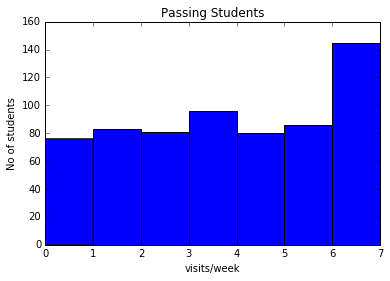

In [130]:
######################################
#                 13                 #
######################################

## Make histograms of the three metrics we looked at earlier for both
## students who passed the subway project and students who didn't. You
## might also want to make histograms of any other metrics you examined.
#refer https://classroom.udacity.com/courses/ud170/lessons/5430778793/concepts/53961386540923
%matplotlib inline

#NB: '%pylab inline' is deprecated, do not use.

import matplotlib.pyplot as plt
import numpy as np
#NB: both these import statements are redundant since imported in cells above.

# Summarize the given data
def describe_data(data, xlabel, title, numBins=7):
    print ('Mean:', np.mean(data))
    print ('Standard deviation:', np.std(data))
    print ('Minimum:', np.min(data))
    print ('Maximum:', np.max(data))
    plt.hist(data, bins=numBins)
    plt.xlabel(xlabel)
    plt.ylabel('No of students')
    plt.title(title)
describe_data(list(passing_visits.values()), "visits/week", "Passing Students")

Mean: 1.95114942529
Standard deviation: 1.88929952676
Minimum: 0
Maximum: 7


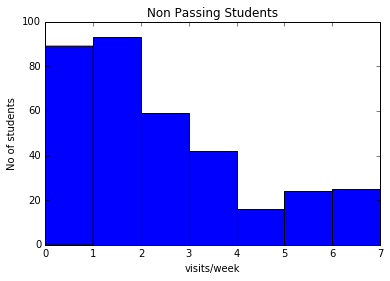

In [131]:
describe_data(list(non_passing_visits.values()), "visits/week", "Non Passing Students")

Mean: 2.04327666151
Standard deviation: 3.1428602763
Minimum: 0
Maximum: 36


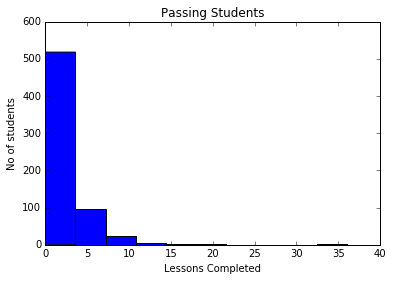

In [132]:
describe_data(list(passing_lessons.values()), "Lessons Completed", "Passing Students", numBins=10)

Mean: 0.867816091954
Standard deviation: 2.54833703959
Minimum: 0
Maximum: 27


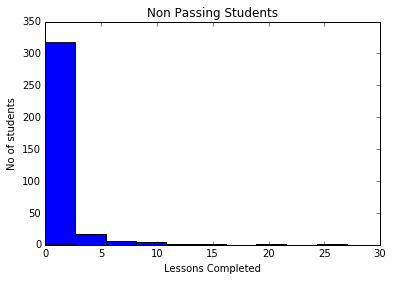

In [133]:
describe_data(list(non_passing_lessons.values()), "Lessons Completed", "Non Passing Students", numBins=10)

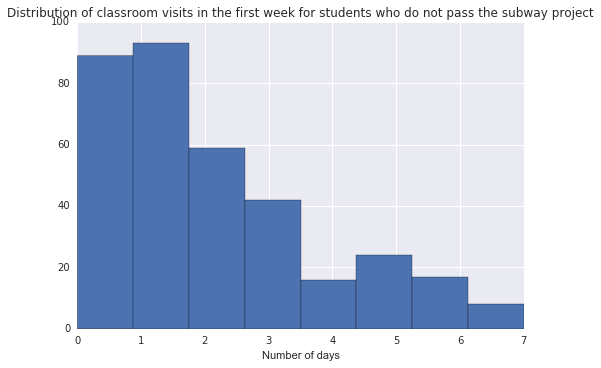

In [137]:
import seaborn as sns

plt.hist(list(non_passing_visits.values()), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who do not pass the subway project')


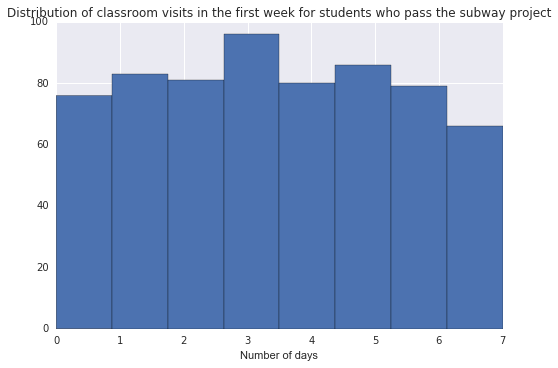

In [138]:
plt.hist(list(passing_visits.values()), bins=8)
plt.xlabel('Number of days')
plt.title('Distribution of classroom visits in the first week ' + 
          'for students who pass the subway project')

## Improving Plots and Sharing Findings

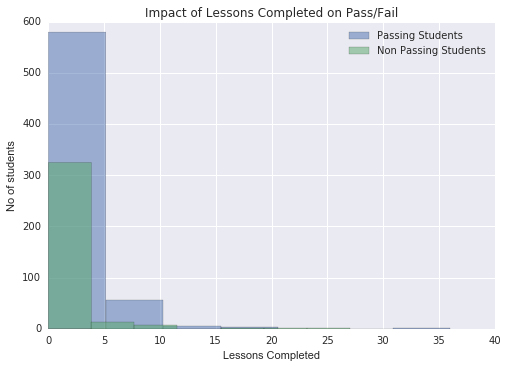

In [141]:
######################################
#                 14                 #
######################################

## Make a more polished version of at least one of your visualizations
## from earlier. Try importing the seaborn library to make the visualization
## look better, adding axis labels and a title, and changing one or more
## arguments to the hist() function.
numBins = 7
plt.hist(list(passing_lessons.values()), bins=numBins, alpha=0.5, label='Passing Students')
plt.hist(list(non_passing_lessons.values()), bins=numBins, alpha=0.5, label='Non Passing Students')
plt.xlabel("Lessons Completed")
plt.ylabel('No of students')
plt.title("Impact of Lessons Completed on Pass/Fail")
pyplot.legend(loc='upper right')
pyplot.show()

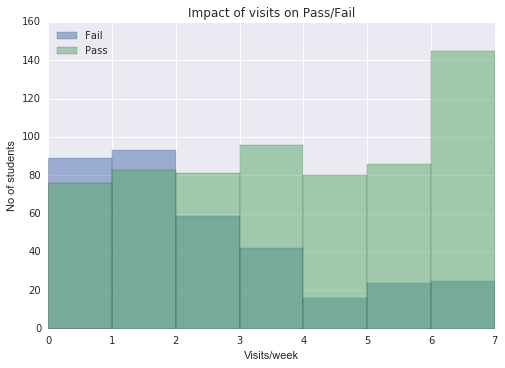

In [149]:

plt.hist(list(non_passing_visits.values()), bins=numBins, alpha=0.5, label='Fail')
plt.hist(list(passing_visits.values()), bins=numBins, alpha=0.5, label='Pass')
plt.xlabel("Visits/week")
plt.ylabel('No of students')
plt.title("Impact of visits on Pass/Fail")
pyplot.legend(loc='upper left')
pyplot.show()
#Note: dark green is where Fail & Pass overlap. 
#Needs a side by side histogram display for better impact.
